In [3]:
from testing import setup_macro, setup_sumo, setup_model

In [4]:
#surpress warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
import torch
import numpy as np
from hydra import initialize, compose

def test(config):

    with initialize(config_path="src/config"):
        cfg = compose(config_name="config", overrides= [f"{key}={value}" for key, value in config.items()])  # Load the configuration
        
    # Import simulator module based on the configuration
    simulator_name = cfg.simulator.name
    if simulator_name == "sumo":
        env, parser = setup_sumo(cfg)
    elif simulator_name == "macro":
        env, parser = setup_macro(cfg)
    else:
        raise ValueError(f"Unknown simulator: {simulator_name}")
    
    use_cuda = not cfg.model.no_cuda and torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    model = setup_model(cfg, env, parser, device)

    print(f'Testing model {cfg.model.name} on {cfg.simulator.name} environment')
    episode_reward, episode_served_demand, episode_rebalancing_cost = model.test(1, env)

    print('Mean Episode Reward: ', np.mean(episode_reward), 'Std Episode Reward: ', np.std(episode_reward))
    print('Mean Episode Served Demand: ', np.mean(episode_served_demand), 'Std Episode Served Demand: ', np.std(episode_served_demand))
    print('Mean Episode Rebalancing Cost: ', np.mean(episode_rebalancing_cost), 'Std Episode Rebalancing Cost: ', np.std(episode_rebalancing_cost))
    
    no_reb_reward = 27592.241758477943
    no_reb_demand = 1599.6
    no_reb_cost = 0.0
    mean_reward = np.mean(episode_reward)
    mean_served_demand = np.mean(episode_served_demand)
    mean_rebalancing_cost = np.mean(episode_rebalancing_cost)


    labels = ['Reward', 'Served Demand', 'Rebalancing Cost']
    rl_means = [mean_reward, mean_served_demand, mean_rebalancing_cost]

    no_control = [no_reb_reward, no_reb_demand, no_reb_cost]

    import matplotlib.pyplot as plt
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(8, 5))
    rects1 = ax.bar(x - width/2, rl_means, width, label='RL Agent', color='tab:blue', capsize=5)
    rects2 = ax.bar(x + width/2, no_control, width, label='No Control', color='tab:orange')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Metrics')
    ax.set_title('Comparison of RL Agent vs No Control')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Function to add value labels on top of bars
    def add_value_labels(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    # Adding value labels to each bar
    add_value_labels(rects1)
    add_value_labels(rects2)

    plt.tight_layout()
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

    ##TODO: ADD VISUALIZATION
    #return episode_reward, episode_served_demand, episode_rebalancing_cost


## Configuration Parameters

You can choose from the following options:

### Simulator:
- **macro**
- **sumo**

### Model:
- **sac** (Soft Actor-Critic)
- **a2c** (Advantage Actor-Critic)
- **no_rebalancing**
- **plus_one** 
- **equal_distribution** 



In [4]:
config = {
    "simulator.name": "macro",
    "model.name": "sac",
    "simulator.city": "nyc_brooklyn",
}
test(config)

Testing model sac on macro environment
Mean Episode Reward:  29921.33283850374 Std Episode Reward:  0.0
Mean Episode Served Demand:  2221.6 Std Episode Served Demand:  0.0
Mean Episode Rebalancing Cost:  361.4 Std Episode Rebalancing Cost:  0.0


Testing model equal_distribution on macro environment
Mean Episode Reward:  47416.19169478036 Std Episode Reward:  0.0
Mean Episode Served Demand:  2927.0 Std Episode Served Demand:  0.0
Mean Episode Rebalancing Cost:  552.0 Std Episode Rebalancing Cost:  0.0


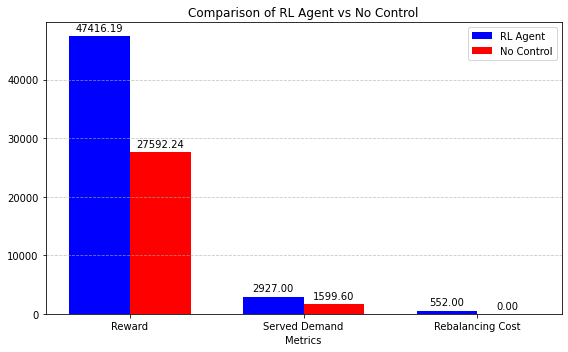

In [9]:
config = {
    "simulator.name": "macro",
    "model.name": "equal_distribution",
    "simulator.city": "nyc_brooklyn",
}
test(config)

In [6]:
config = {
    "simulator.name": "macro",
    "model.name": "equal_distribution",
    "simulator.city": "nyc_brooklyn",
    "model.cplexpath": None, 
}
test(config)

Testing model equal_distribution on macro environment
Mean Episode Reward:  49166.67480956457 Std Episode Reward:  718.4252287993113
Mean Episode Served Demand:  2981.6 Std Episode Served Demand:  54.380511214956414
Mean Episode Rebalancing Cost:  498.4 Std Episode Rebalancing Cost:  60.171754170873236
